# Problem Statement
<b>About Company</b><br/>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

<b>Problem</b><br/>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
![title](loan.png)

## Data

|Variable|Description|<br/>
|--------|:---------:|
|Loan_ID|Unique Loan ID|<br/>
|Gender|Male/Female|
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|Loan approved (Y/N)|

 

<b>Note:</b> 

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
You are expected to upload the solution in the format of "sample_submission.csv"

# Solution/Approach:
Below are <b>some of the factors</b> which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

<b>Education</b> : Tier1 college,Achievements etc<br/>
<b>Company</b> : Company background<br/>
<b>Salary</b>: Applicants with high income should have more chances of loan approval.<br/>
<b>Previous history</b>: Applicants who have repayed their previous debts should have higher chances of loan approval.<br/>
<b>Loan amount</b>: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.<br/>
<b>Loan term</b>: Loan for less time period and less amount should have higher chances of approval.<br/>
<b>EMI</b>: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

#### Steps
1. Reading csv/tsv etc file and then checking dimension,few rows to know little about data etc
2. Variable identification to know about <b>continuous or categorical in nature</b>
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using <b>t-test</b> and categorical-categorical variables using     
    <b>chi2_contingency</b> etc
5. Missing Values Treatment<br/>
    For continuous variables i am replacing missing values by zero,mean or median etc.It totally depends on type of values     
    present.<br/>
    For categorical variables i am replacing missing values by zero,mode etc.It totally depends on type of values present.
6. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>IQR</b> , i am replacing that outliers with mean,median or     mode.
7. Variable Transormation:<br/>
    According to <b>left or right skewness</b>, transforming variables by using log,square,cube etc to obtain <b>symmetrical         distrribution</b>
    
8. Modeling:<br/>
   a.Converting categorical variable into <b>dummies variables</b><br/>
   b.Separating indepedent and dependent variable from our data set<br/>
   c.Splitting these separated data into train and test data,must keeping <b>random_state=Numerical value</b><br/>
   d.Using LogisticRegression object to fit the model on our train data<br/>
   e.Now Predicting the value for test data<br/>
   f.Finally checking the accuracy of our model.<br/>

## 1.Reading and Exploring Data set 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
data_train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
data_test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [109]:
original_data_train=data_train.copy()
original_data_test=data_test.copy()

In [110]:
data_train.shape,data_test.shape

((614, 13), (367, 12))

In [111]:
data_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [112]:
data_test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [113]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## 2.Variables Identification:

In [115]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 3.Univariate Analysis:

### A.Continuous Variables

In [116]:
# it doesn't mean those whose data type is int64,float64 is always continuous in nature b'coz there are many 
# categorical variable which are already available in dataset in numerical form
# here 'Credit_History' is one such variable

In [117]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Observation:
A. ApplicantIncome  : <b>No missing value</b>,large difference between max and min<br/>
B. CoapplicantIncome: <b>No missing value</b>,large difference between max and min,<b>no data in Q1</b><br/>
C. LoanAmount       : <b>missing value</b>,large difference between max and min<br/>
D. Loan_Amount_Term	: <b>missing value</b>,not so large difference between max and min,<b>all data lie in Q1</b><br/>

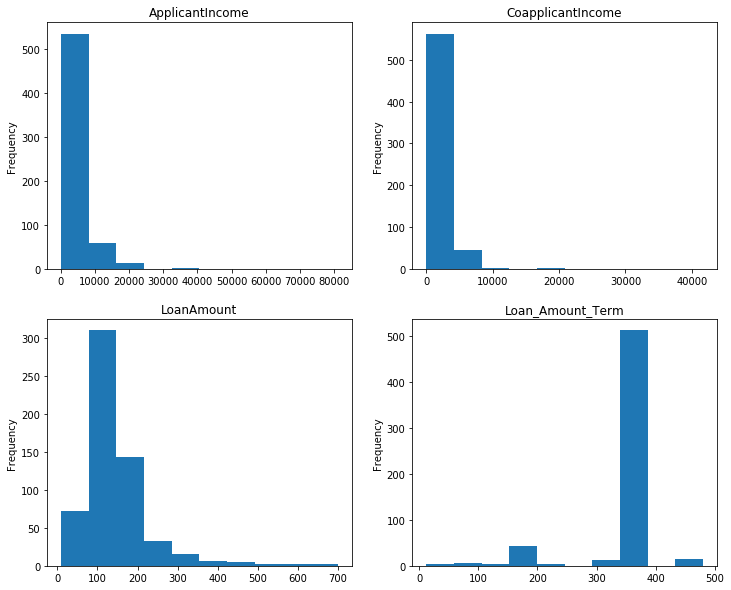

In [118]:
# bins size(interval on x-axis like 0-10,11-20,21-30,...etc) can be of different size in case of histogram and if i increase 
# interval size of bins then their height also increases b'coz now it covers more no. of data points and histogram is generally 
# use for quantitative(continuous) variables.
# while for qualitative(categorical) variables we used bar plot generally but in case of bar plot bin size of each categorical 
# value of particular columns must remain constant 

plt.figure(1)
plt.subplot(221)
plt.title('ApplicantIncome')
data_train['ApplicantIncome'].plot.hist(figsize=(12,10))

plt.subplot(222)
plt.title('CoapplicantIncome')
data_train['CoapplicantIncome'].plot.hist()

plt.subplot(223)
plt.title('LoanAmount')
data_train['LoanAmount'].plot.hist()

plt.subplot(224)
plt.title('Loan_Amount_Term')
data_train['Loan_Amount_Term'].plot.hist()

### Observation:
A. out of 600 people,almost 530 people have applicant income<=5000<br/>
B. out of 600 people,almost 570 people have coapplicant income<=5000<br/>
C. out of 600 people,almost 350 people have 80k<=loan amount<=130k<br/>
D. out of 600 people,almost 500 people have 320months <=loan amount term<= 370months

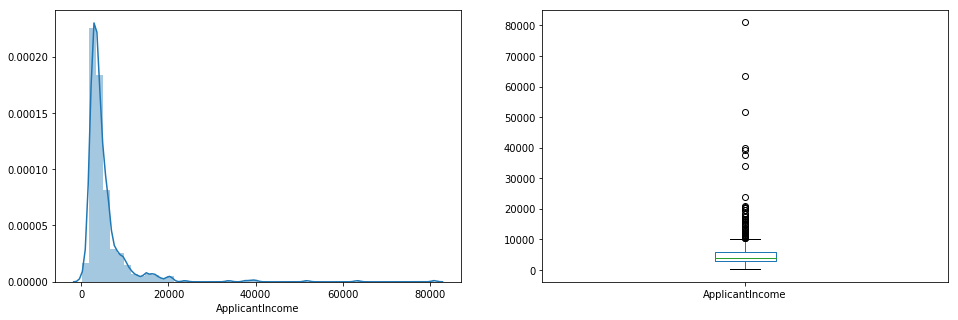

In [119]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data_train['ApplicantIncome'])

plt.subplot(122)
data_train['ApplicantIncome'].plot.box(figsize=(16,5))

## Observation:
As in box plot there are many outliers which indicates that there are many applicants whose income is large
So in next step i want to see which(graduated or non-graduated) have more outliers

Text(0.5,0.98,'')

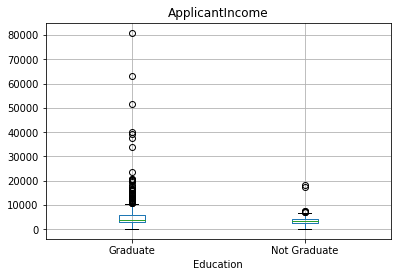

In [120]:
data_train.boxplot('ApplicantIncome',by='Education')
plt.suptitle("")

## Observation:
What i expect,i got exactly same.<br/>
Graduate have more income(outliers) than Non-graduated

## B.Categorical Variables:

In [121]:
# 1st seeing those categorical variable which are not ordinal

In [122]:
data_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

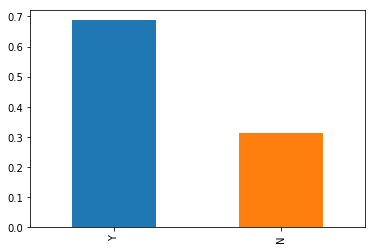

In [123]:
data_train['Loan_Status'].value_counts(normalize=True).plot.bar()

### Observation:
Almost 70% loan demand is approved

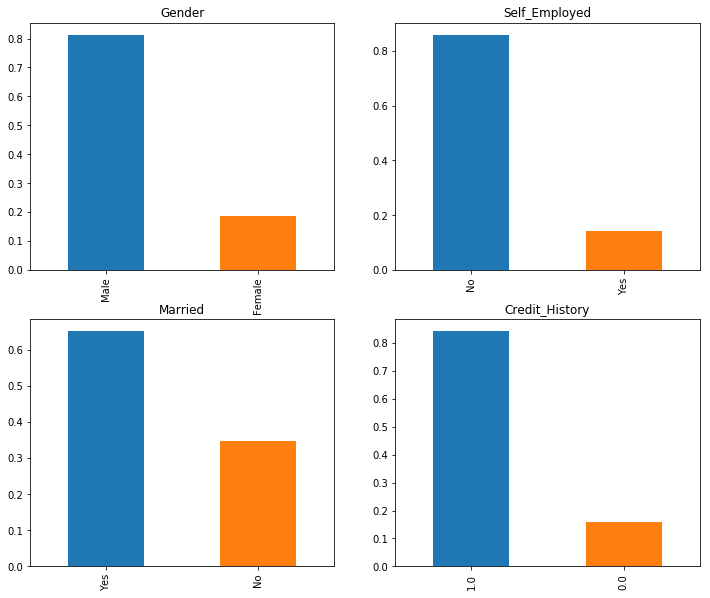

In [124]:
plt.figure(1)

plt.subplot(221)
plt.title('Gender')
data_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(12,10))

plt.subplot(222)
plt.title('Self_Employed')
data_train['Self_Employed'].value_counts(normalize=True).plot.bar()

plt.subplot(223)
plt.title('Married')
data_train['Married'].value_counts(normalize=True).plot.bar()

plt.subplot(224)
plt.title('Credit_History')
data_train['Credit_History'].value_counts(normalize=True).plot.bar()

### Observation:
A. 80 % of people are male<br/>
B. 85% of people are self employed<br/>
C. 65% of people are married<br/>
D. 85% of people have good credit history

In [125]:
# plotting graph for categorical variable which are 'ORDINAL'

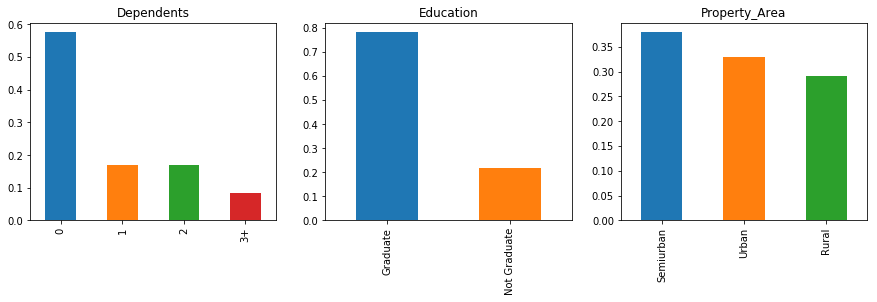

In [126]:
plt.figure(1)

plt.subplot(231)
plt.title('Dependents')
data_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,8))

plt.subplot(232)
plt.title('Education')
data_train['Education'].value_counts(normalize=True).plot.bar()


plt.subplot(233)
plt.title('Property_Area')
data_train['Property_Area'].value_counts(normalize=True).plot.bar()


## Observation:
A. 60% of people are independent<br/>
B. 80% of people are graduated<br/>
C. 40% people are from semiurban

## Bivariate Analysis:

### A.categorical-categorical variables:

In [127]:
Gender=pd.crosstab(data_train['Gender'],data_train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Gender
Female    112
Male      489
dtype: int64

Gender
Female    112.0
Male      489.0
dtype: float64

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


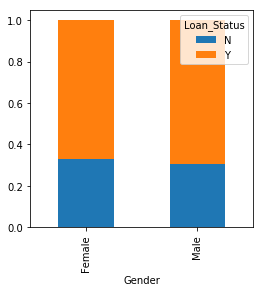

In [128]:
print(Gender.sum(1))# row wise sume of previous step table
print()
print(Gender.sum(1).astype(float))
print()
print(Gender.div(Gender.sum(1).astype(float), axis=0)) # from previous step 37/(37+75) so on

# stacked bar plot will give us the proportion of approved and unapproved loans.

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

## Observation:
Almost male and female have same number of approved of loans

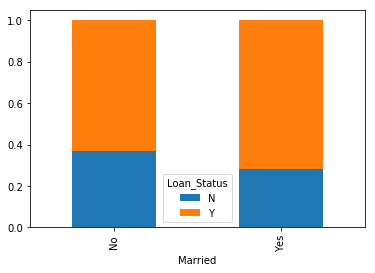

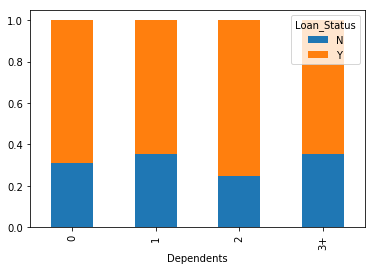

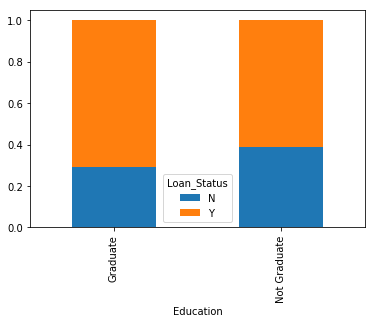

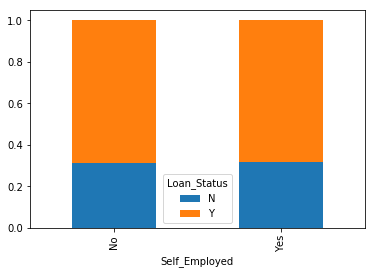

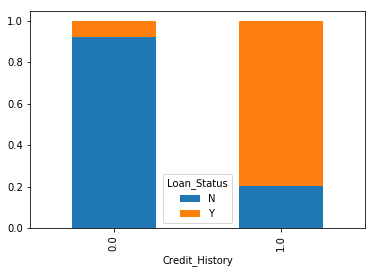

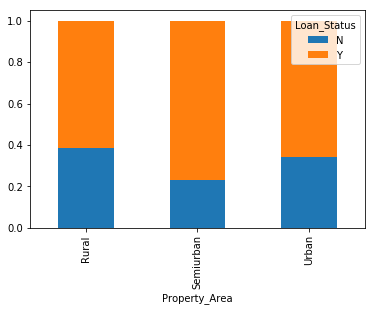

In [129]:
Married=pd.crosstab(data_train['Married'],data_train['Loan_Status'])
Dependents=pd.crosstab(data_train['Dependents'],data_train['Loan_Status'])
Education=pd.crosstab(data_train['Education'],data_train['Loan_Status'])
Self_Employed=pd.crosstab(data_train['Self_Employed'],data_train['Loan_Status'])
Credit_History=pd.crosstab(data_train['Credit_History'],data_train['Loan_Status'])
Property_Area=pd.crosstab(data_train['Property_Area'],data_train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

## Observation:
A.Married people have more loan approved<br/>
B.2 dependents have max loan approved while 1 and 3+ have almost same no. of loan approved<br/>
C.Graduate people have more loan approved<br/>
D.No difference is visible in self employed plot see <b>next step chi2</b><br/>
E.Those people who have good credit score have large number of loan approved<br/>
F.Rural people have max number of loan approved

In [130]:
# P-vale=0.942>0.05 so there is no statistical difference

from scipy.stats import chi2_contingency
chi2_contingency(Self_Employed)

(0.005292770110001114,
 0.9420039242223718,
 1,
 array([[157.21649485, 342.78350515],
        [ 25.78350515,  56.21649485]]))

### Categorical-continuous variables:

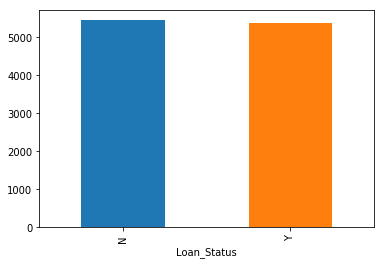

In [131]:
data_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

### Observation:
No difference is visible in above graph<b>(see next few steps for the solution)</b>

In [132]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [133]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
data_train['income_bin']=pd.cut(data_train['ApplicantIncome'],bins,labels=group)

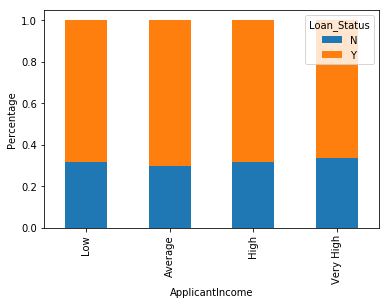

In [134]:
income_bin=pd.crosstab(data_train['income_bin'],data_train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage') # run these two line alternatively and see output to understand why i am assigning it to p
# plt.ylabel('Percentage')

## Observation:
As previously,during hypothesis generation,i told that applicant income is affecting Loan status but just in above graph there is <b>NO</b> effect of applicant income on Loan_status or approval


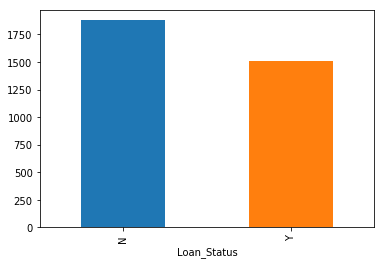

In [135]:
data_train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

# Observation:
Those having high mean value of coapplicantIncome have less approval of loan 

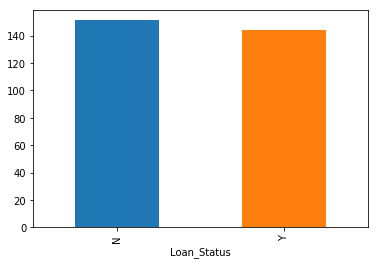

In [136]:
data_train.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()

## Note:-
Now combining "AppicantIncome" and "CoapplicantIncome" and then seeing any effect on Loan_Status

In [137]:
data_train['Total_income']=data_train['ApplicantIncome']+data_train['CoapplicantIncome']

In [138]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very High"]
data_train['Total_income_bin']=pd.cut(data_train['Total_income'],bins,labels=group)

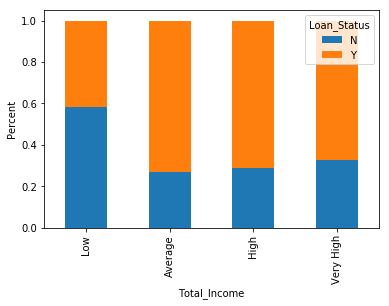

In [139]:
Total_income_bin=pd.crosstab(data_train['Total_income_bin'],data_train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
p=plt.ylabel('Percent')

## Observation:
We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared 
to that of applicants with Average, High and Very High Income.

In [140]:
bins=[0,100,200,700]
group=['Low','Average','High']
data_train['LoanAmount_bin']=pd.cut(data_train['LoanAmount'],bins,labels=group)

Text(0,0.5,'Percentage')

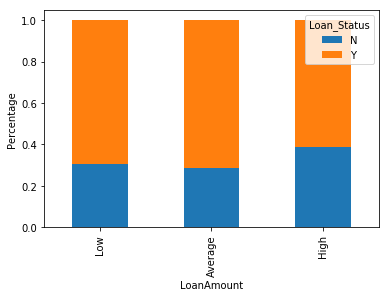

In [141]:
LoanAmount_bin=pd.crosstab(data_train['LoanAmount_bin'],data_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

## Observation:
Already this thing we had expected if loan amount is less there is more chance of approval

In [142]:
# four extra columns

data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Total_income,Total_income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,6000.0,High,Average


In [143]:
# now dropping bin for further exploration:
data_train=data_train.drop(['income_bin','LoanAmount_bin', 'Total_income_bin', 'Total_income'], axis=1)

In [144]:
# change the 3+ in dependents variable to 3 to make it a numerical variable to find its correlation with numerical variables
data_train['Dependents'].replace('3+',3,inplace=True)
data_test['Dependents'].replace('3+',3,inplace=True)

In [145]:
# convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables
data_train['Loan_Status'].replace('N',0,inplace=True)
data_train['Loan_Status'].replace('Y',1,inplace=True)

## Continuous-Continuous Variables:

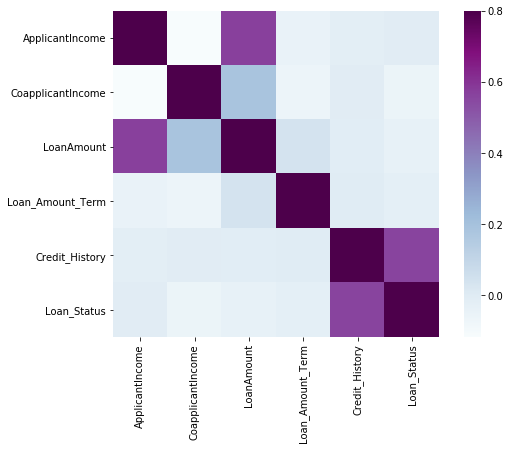

In [146]:
# heatmap is used to visualize the correlation
# variables with darker means their correlation is more

matrix =data_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing value treatment:

In [147]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Observation:
There are missing values in these columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [148]:
# numerical or continuous variable missing values is generally replaced by mean(if no outliers) or median or mode(less) or zero 
# categorical variable missing values is generally replaced by mode or zero

In [149]:
# replacing by mode
data_train['Gender'].fillna(data_train['Gender'].mode()[0],inplace=True)

In [150]:
# checking missing value
data_train['Gender'].isnull().sum()

0

In [151]:
data_train['Married'].fillna(data_train['Married'].mode()[0],inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0],inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0],inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0],inplace=True)

In [152]:
# in some numerical variable case i am also using mode due to large occurence of any specific value
data_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [153]:
# 512 occuring most of the time

data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [154]:
# LoanAmount has outliers so we use median for it
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(),inplace=True)

In [155]:
# checking is there any missing values remain in our data_train
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [156]:
# now test dataset
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [157]:
data_test['Gender'].fillna(data_test['Gender'].mode()[0],inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0],inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0],inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0],inplace=True)

In [158]:
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0],inplace=True)

In [159]:
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(),inplace=True)

In [160]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment:

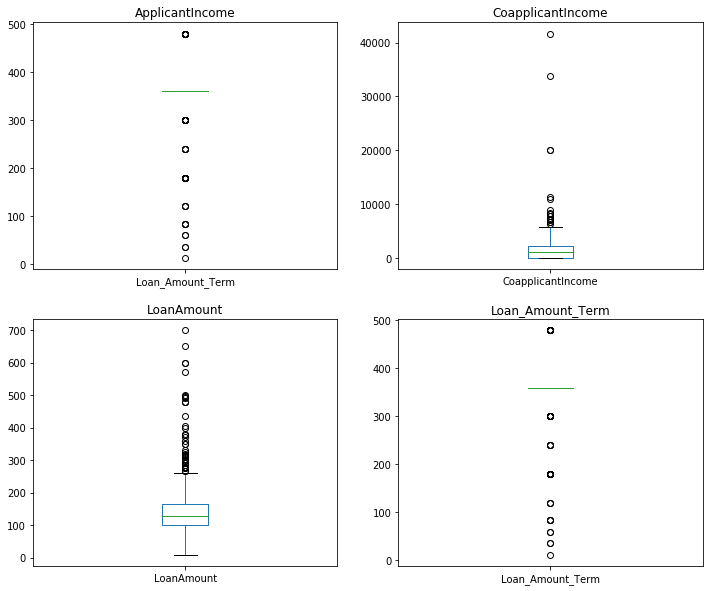

In [161]:
plt.figure(1)
plt.subplot(221)
plt.title('ApplicantIncome')
data_train['Loan_Amount_Term'].plot.box(figsize=(12,10))

plt.subplot(222)
plt.title('CoapplicantIncome')
data_train['CoapplicantIncome'].plot.box()

plt.subplot(223)
plt.title('LoanAmount')
data_train['LoanAmount'].plot.box()

plt.subplot(224)
plt.title('Loan_Amount_Term')
data_train['Loan_Amount_Term'].plot.box()

In [162]:
# now run above step again

data_train.loc[data_train['CoapplicantIncome']>5743.125,'CoapplicantIncome']=np.median(data_train['CoapplicantIncome'])

In [163]:
data_train.loc[(data_train['LoanAmount']>261.5) & (data_train['LoanAmount']<3.5),'LoanAmount']=np.median(data_train['LoanAmount'])

# Transformation:

"plt.subplot(223)\nnp.sqrt(data_train['ApplicantIncome']).plot.hist()\n\nplt.subplot(224)\nnp.power(data_train['ApplicantIncome'],1/3).plot.hist()"

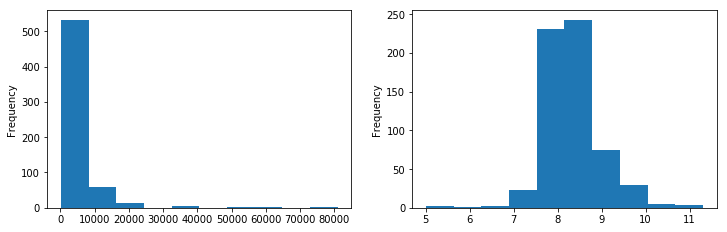

In [164]:
# check with all possible select those which is more normally distributed

plt.figure(1)

plt.subplot(221)
data_train['ApplicantIncome'].plot.hist(figsize=(12,8))

plt.subplot(222)
np.log(data_train['ApplicantIncome']).plot.hist()

"""plt.subplot(223)
np.sqrt(data_train['ApplicantIncome']).plot.hist()

plt.subplot(224)
np.power(data_train['ApplicantIncome'],1/3).plot.hist()"""

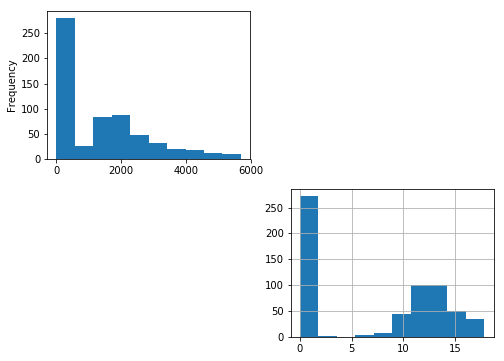

In [165]:
plt.subplot(221)
data_train['CoapplicantIncome'].plot.hist(figsize=(8,6))

#plt.subplot(222)
#np.log(data_train['CoapplicantIncome']).plot.hist()

#plt.subplot(223)
#np.sqrt(data_train['CoapplicantIncome']).plot.hist()

plt.subplot(224)
np.power(data_train['CoapplicantIncome'],1/3).hist()

"plt.subplot(223)\nnp.sqrt(data_train['LoanAmount']).plot.hist()\n\nplt.subplot(224)\nnp.power(data_train['LoanAmount'],1/3).hist()"

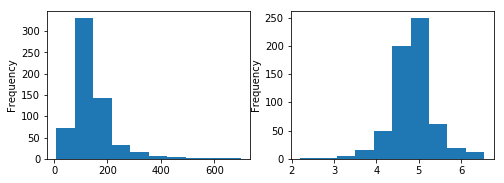

In [166]:
plt.subplot(221)
data_train['LoanAmount'].plot.hist(figsize=(8,6))

plt.subplot(222)
np.log(data_train['LoanAmount']).plot.hist()

"""plt.subplot(223)
np.sqrt(data_train['LoanAmount']).plot.hist()

plt.subplot(224)
np.power(data_train['LoanAmount'],1/3).hist()"""

In [167]:
"""plt.subplot(221)
data_train['Loan_Amount_Term'].plot.hist(figsize=(8,6))

plt.subplot(222)
np.log(data_train['Loan_Amount_Term']).plot.hist()

plt.subplot(223)
np.sqrt(data_train['Loan_Amount_Term']).plot.hist()

plt.subplot(224)
np.power(data_train['Loan_Amount_Term'],1/3).hist()"""

"plt.subplot(221)\ndata_train['Loan_Amount_Term'].plot.hist(figsize=(8,6))\n\nplt.subplot(222)\nnp.log(data_train['Loan_Amount_Term']).plot.hist()\n\nplt.subplot(223)\nnp.sqrt(data_train['Loan_Amount_Term']).plot.hist()\n\nplt.subplot(224)\nnp.power(data_train['Loan_Amount_Term'],1/3).hist()"

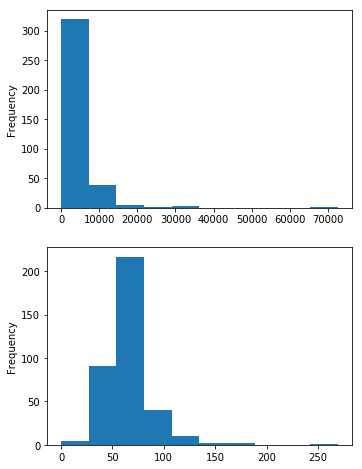

In [168]:
# now for test data

plt.figure(1)

plt.subplot(221)
data_test['ApplicantIncome'].plot.hist(figsize=(12,8))

#plt.subplot(222)
#np.log(data_test['ApplicantIncome']).plot.hist()

plt.subplot(223)
np.sqrt(data_test['ApplicantIncome']).plot.hist()

#plt.subplot(224)
#np.power(data_test['ApplicantIncome'],1/3).plot.hist()


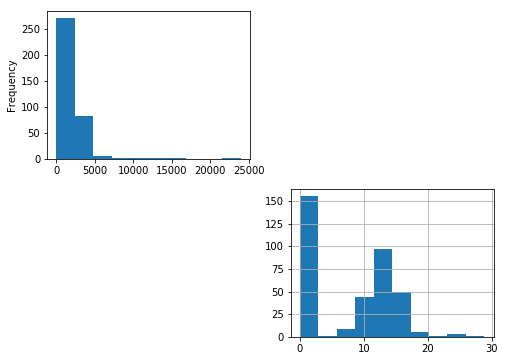

In [169]:
plt.subplot(221)
data_test['CoapplicantIncome'].plot.hist(figsize=(8,6))

#plt.subplot(222)
#np.log(data_test['CoapplicantIncome']).plot.hist()

#plt.subplot(223)
#np.sqrt(data_test['CoapplicantIncome']).plot.hist()

plt.subplot(224)
np.power(data_test['CoapplicantIncome'],1/3).hist()

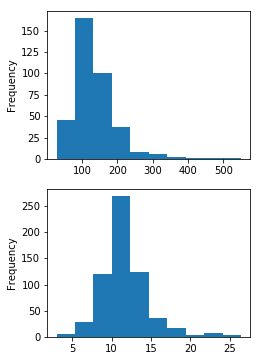

In [170]:
plt.subplot(221)
data_test['LoanAmount'].plot.hist(figsize=(8,6))

#plt.subplot(222)
#np.log(data_test['LoanAmount']).plot.hist()

plt.subplot(223)
np.sqrt(data_train['LoanAmount']).plot.hist()

#plt.subplot(224)
#np.power(data_train['LoanAmount'],1/3).hist()

# Modeling:

In [171]:
x=data_train.drop('Loan_Status',axis=1)
y=data_train['Loan_Status']
print(x.shape)
print(y.shape)

(614, 12)
(614,)


In [172]:
x_x=x.drop('Loan_ID',axis=1)
print(x_x.shape)

(614, 11)


In [173]:
y_test=data_test.drop('Loan_ID',axis=1)
print(y_test.shape)

(367, 11)


In [174]:
# now creating dummies variable for categorical variable
x_xx=pd.get_dummies(x_x)
print(x_xx.shape)

(614, 20)


In [175]:
y_yy=pd.get_dummies(y_test)
print(y_yy.shape)

(367, 20)


In [176]:
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_xx,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 20)
(123, 20)
(491,)
(123,)


In [177]:
from sklearn.linear_model import LogisticRegression

# forming model
linreg=LogisticRegression()

# fitting the model
linreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
# predicting the values
pred=linreg.predict(x_test)
pred.shape

(123,)

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8292682926829268

In [180]:
# predicting on test data set
y_pred=linreg.predict(y_yy)

In [181]:
submission=pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')
submission.head(3)

,Loan_ID,Loan_Status


In [182]:
submission['Loan_Status']=y_pred
submission['Loan_ID']=original_data_test['Loan_ID']

In [185]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [186]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)